## Applying Random Forest Algorithm to the pre-processed data

In [150]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
from sklearn import metrics
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from  sklearn.cross_validation import train_test_split
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [151]:
data_X = pd.read_csv('X_modified.csv')
data_y = pd.read_csv('y_modified.csv')

In [152]:
#Spliting the dataset into training and testing set
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,random_state =0)

In [153]:
model = sk.ensemble.RandomForestRegressor(n_estimators=100)

In [154]:
#Fitting the training data and creating the baseline model
model.fit(X_train,y_train)


/home/prashant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [155]:
#Predicting the known values of the power
y_pred =model.predict(X_train)

In [156]:
y_train_list=y_train.Power_Produced.tolist()

In [157]:
combine =list(zip(y_train_list, y_pred))
lim =100
plot_list_pred = []
plot_list_actual = []
for i in range (0,lim):
    plot_list_pred.append(combine[i][1])
    plot_list_actual.append(combine[i][0])


In [158]:
#Creating the dataframe 
data_new = pd.DataFrame(plot_list_pred,plot_list_actual)

data_new=data_new.reset_index()
col_name = ['Actual_Value','Predicted_Value']
data_new.columns = col_name


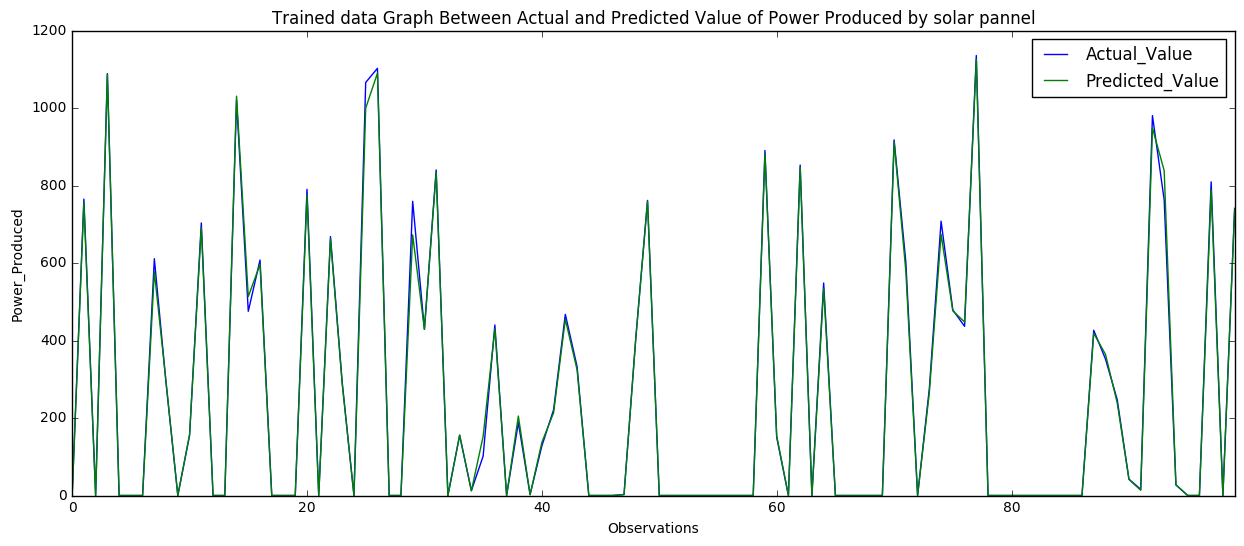

In [159]:
data_new.plot()
plt.xlabel("Observations")
plt.ylabel("Power_Produced")
plt.title("Trained data Graph Between Actual and Predicted Value of Power Produced by solar pannel")
plt.show()

In [160]:
#Predicting the Power Produced using the testing data
y_pred_test = model.predict(X_test)

In [161]:
#Insample Accuracy
from sklearn import metrics
print("The Explained Variance Score(Trained data or Insample data) is: ")
metrics.explained_variance_score(y_train, y_pred)

The Explained Variance Score(Trained data or Insample data) is: 


0.99457984569380753

In [162]:
#Out of Sample Accuracy

from sklearn import metrics
print("The Explained Variance Score(Out of Sample score) is: ")
metrics.explained_variance_score(y_test, y_pred_test)

The Explained Variance Score(Out of Sample score) is: 


0.96236637941879877

In [163]:
y_test_list=y_test.Power_Produced.tolist()

In [164]:
combine_test = combine =list(zip(y_test_list, y_pred_test))
plot_pred = []
plot_actual = []
for i in range (0,100):
    plot_pred.append(combine[i][1])
    plot_actual.append(combine[i][0])


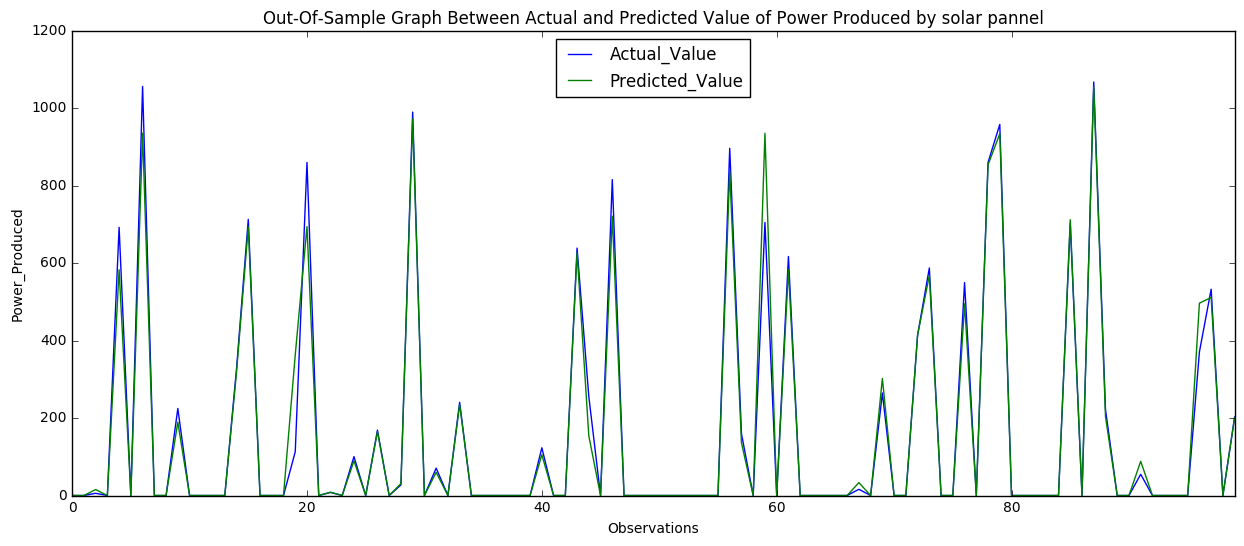

In [165]:
data_new = pd.DataFrame(plot_pred,plot_actual)

data_new=data_new.reset_index()
col_name = ['Actual_Value','Predicted_Value']
data_new.columns = col_name
data_new.plot(alpha=2)
plt.xlabel("Observations")
plt.ylabel("Power_Produced")
plt.title("Out-Of-Sample Graph Between Actual and Predicted Value of Power Produced by solar pannel")
plt.show()

## Very Good Model

In [166]:
#Printing RMSE value
print(np.sqrt(metrics.mean_squared_error(y_test_list, y_pred_test)))

68.1449309417
